# INPUT DATA

Load required libraries

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

Upload data from directory

In [ ]:
uploaded = files.upload()
df = pd.read_csv('RAtarget.csv')

Saving lab.csv to lab.csv


In [ ]:
uploaded = files.upload()
ra = pd.read_csv('RAgenes.csv')

Saving clear100ex.csv to clear100ex.csv


Data processing

In [ ]:
column_to_separate = 'name'
name = ra[[column_to_separate]].copy()
ra = ra.drop(column_to_separate, axis=1)

In [ ]:
ra

,7893107,7893526,7893543,7893569,7894089,7894095,7894169,7894284,7894637,7894965,...,8154047,8154215,8154223,8163712,8168115,8168886,8178802,8178811,8180214,8180282
0,3.27081,6.29636,11.0876,3.88065,9.07261,7.16129,5.97489,10.4409,8.46360,6.74043,...,3.69110,6.04761,6.16912,3.12952,6.89926,5.42731,12.0939,12.1644,5.84077,7.31473
1,2.70668,5.49734,10.7325,2.89858,9.01030,6.80941,6.39396,10.7604,8.02336,6.97154,...,3.63519,6.29744,6.29382,2.43400,6.43828,5.59528,12.0252,12.1965,5.10300,7.11119
2,3.05276,6.58236,10.8271,3.33602,9.28394,7.21462,6.73186,10.8283,8.50749,7.26604,...,3.36491,6.69556,6.72395,2.66750,6.65290,5.65206,11.4784,11.4410,5.55251,7.04199
3,4.06415,6.20839,10.7144,3.40275,8.96513,6.75700,5.92767,10.5097,7.86061,6.77955,...,3.56970,6.56189,6.51487,2.19485,6.85107,5.15052,11.7745,11.8101,5.33672,7.20546
4,3.68179,6.45172,10.7259,3.70835,8.91285,7.21777,5.71687,10.8269,8.39964,7.06498,...,3.55664,6.72436,6.65756,2.44822,6.90136,5.14346,11.5797,11.6907,4.94236,6.93663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2.85862,6.30271,10.7956,3.46289,9.28916,6.69736,5.15867,10.1574,8.15172,6.57593,...,3.43578,6.02973,5.87783,2.23212,6.58988,5.34187,11.4564,11.5035,4.63423,7.22421
74,2.94687,6.38078,10.6272,3.02912,8.81766,6.33852,5.24847,10.0076,7.93468,7.28884,...,3.43033,6.00680,6.15518,2.63353,6.76783,5.19677,11.6879,11.5910,4.78864,7.04232
75,3.58041,5.93240,10.4963,2.40597,8.66681,6.55605,5.40591,10.0683,7.64977,7.12128,...,3.51900,5.79387,5.59603,2.22126,6.64367,5.13537,11.3638,11.2883,4.48931,7.23500
76,3.62626,6.62424,10.6817,3.47735,9.16072,6.64447,6.38243,10.4259,7.63139,7.17340,...,3.52941,6.97181,6.76539,2.87647,6.78706,5.19001,12.0531,11.8646,5.43224,6.81322


In [ ]:
df = df.replace({'response: R - responder': 1, 'response: NR - non-responder': 0})
df.index = range(1, len(df) + 1)

#Underlying algorithm: Support Vector Machine (SVM)

Split the data into training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ra, df,   test_size=0.2, random_state=42, stratify=df)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
# Create an SVM classifier with a linear kernel after hyperparameter tuning with gridsearchcv
SVM = svm.SVC(kernel='linear', C=0.01, probability=True)
# Train the classifier on the training data
SVM.fit(X_train, y_train)
# Test the classifier on the testing data
accuracy = SVM.score(X_test, y_test)
print("Accuracy:", accuracy)
# Test the classifier on the testing data
y_pred = SVM.predict(X_test)
# Print the prediction probabilities for the first 10 samples in the testing set (The desired output for Cp)
probas = SVM.predict_proba(X_test)
print(probas)

Accuracy: 0.875
[[0.0205789  0.9794211 ]
 [0.01071942 0.98928058]
 [0.91253688 0.08746312]
 [0.48800661 0.51199339]
 [0.9465707  0.0534293 ]
 [0.02694503 0.97305497]
 [0.99347772 0.00652228]
 [0.04680382 0.95319618]
 [0.31351786 0.68648214]
 [0.83893311 0.16106689]
 [0.01823363 0.98176637]
 [0.97110595 0.02889405]
 [0.01500255 0.98499745]
 [0.97933962 0.02066038]
 [0.9866929  0.0133071 ]
 [0.96750805 0.03249195]]


In [ ]:
y_pred #The predicted class

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
y_test #The real class

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

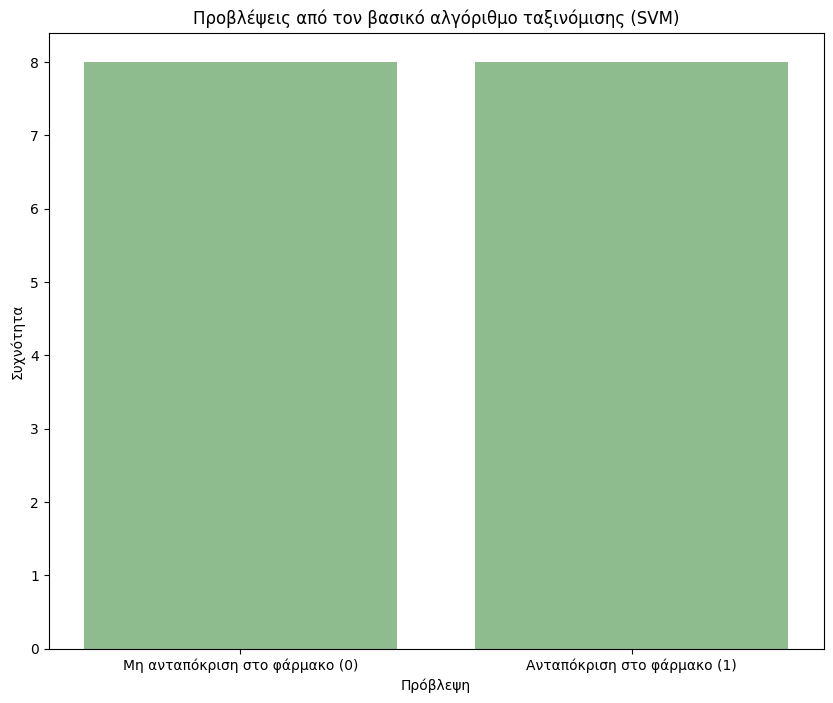

In [ ]:
num_responders = np.sum(y_pred == 0)
num_non_responders = np.sum(y_pred == 1)
# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.bar(['Non Responder (0)', 'Responder (1)'], [num_responders, num_non_responders], color=['darkseagreen', 'darkseagreen'])
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.title('Predictions from thw underlying algorithm (SVM)')
plt.show()

In [ ]:
print('ROC AUC: {}'.format(roc_auc_score(y_test, probas[:,1])))

ROC AUC: 0.984375


#Evaluation Metrics

This is the metric for the accuracy for a region prediction. When an error occurs, means that the region of prediction does not contain the true value.


In [ ]:

def get_accuracy(prediction, real_class):
    c = 0
    N = len(prediction)
    for i in range(0, N):
        if prediction[i][real_class[i]]:
            c += 1
    return c / N

These are the metrics that counts the mean of singleton predictions (oneC) and the mean of the number of prediction (avgC) for of the region prediction. Ιdeally we want these metrics to be close to 1.

In [ ]:
def get_oneC_avgC(prediction):
    arr = np.array(prediction)
    oneC = 0
    avgC = 0
    for i in range(0, len(arr)):
        # number of predicted lables
        num_predicted = arr[i].sum()
        avgC += num_predicted
        # is it a singleton?
        if num_predicted == 1:
            oneC += 1
        pass
    oneC /= len(arr)
    avgC /= len(arr)
    return oneC, avgC

#Now Lets talk about Tranductive Conformal Predition (TCP) with SVM

In [ ]:
df.value_counts() #number of patients per class

label
1        40
0        38
dtype: int64

In [ ]:
x = X_test.iloc[0] #The first patient of the test set and his gene expressions
x

7893107     3.54953
7893526     6.71185
7893543    10.72330
7893569     3.61611
7894089     9.25846
             ...   
8168886     5.97162
8178802    12.06910
8178811    12.19040
8180214     5.80909
8180282     7.00873
Name: 25, Length: 100, dtype: float64

In [ ]:
y_test = pd.Series(y_test)

In [ ]:
y = y_test.iloc[0] #The first patient belongs to class 1 (Responder)

1

In [ ]:
probas[0]

array([0.0205789, 0.9794211])

##DEFINE THE NON CONFORMITY MEASURE

The non conformity measure is defined as the inverse probability

In [ ]:
def InverseProbabilityNC(predicted_score, y):
  prob = np.zeros(y.size, dtype=np.float32)
  for i, y_ in enumerate(y):
    if y_ >= predicted_score.shape[1]:
      prob[i] = 0
    else:
      prob[i] = predicted_score[i, int(y_)]
  return 1 - prob

In [ ]:
# Here, we concatenate the first point from the test dataset (first patient) to the training data set
X_train_plus_test = pd.concat([X_train,pd.DataFrame(X_test.iloc[0]).T])
X_train_plus_test

,7893107,7893526,7893543,7893569,7894089,7894095,7894169,7894284,7894637,7894965,...,8154047,8154215,8154223,8163712,8168115,8168886,8178802,8178811,8180214,8180282
41,3.92671,4.66173,10.3706,2.31925,8.44160,6.49809,4.79078,9.91193,6.75317,7.22461,...,3.68501,5.34808,5.29472,2.65611,6.31427,4.59709,11.8185,11.7594,4.80899,7.58593
73,2.85862,6.30271,10.7956,3.46289,9.28916,6.69736,5.15867,10.15740,8.15172,6.57593,...,3.43578,6.02973,5.87783,2.23212,6.58988,5.34187,11.4564,11.5035,4.63423,7.22421
29,3.33920,5.74298,11.2860,3.98558,9.28443,7.15662,5.51320,10.71170,8.32088,7.23760,...,3.43424,6.71150,6.71421,3.43583,7.12950,5.54175,12.3253,12.3329,5.33113,7.20332
2,3.05276,6.58236,10.8271,3.33602,9.28394,7.21462,6.73186,10.82830,8.50749,7.26604,...,3.36491,6.69556,6.72395,2.66750,6.65290,5.65206,11.4784,11.4410,5.55251,7.04199
15,2.94579,5.76827,10.7013,3.05181,9.11173,7.24228,5.81846,10.79850,8.29914,7.05916,...,3.60676,7.07412,6.62773,2.83667,6.73586,5.78094,12.3495,12.3425,5.43191,7.00327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,3.27081,6.29636,11.0876,3.88065,9.07261,7.16129,5.97489,10.44090,8.46360,6.74043,...,3.69110,6.04761,6.16912,3.12952,6.89926,5.42731,12.0939,12.1644,5.84077,7.31473
40,3.08142,5.54288,10.9706,2.99158,8.79226,6.51942,4.60594,10.12800,7.61213,7.03276,...,3.37475,6.52437,6.10397,2.47743,6.72121,4.95979,11.4829,11.6196,4.59369,7.56474
30,3.03072,5.09894,10.8433,4.14534,8.90374,6.94960,5.27088,10.39580,8.03399,7.35594,...,3.53758,6.60775,6.71153,2.90895,6.47328,5.39685,12.1345,12.2215,5.84823,6.84011
35,3.51230,6.59808,10.7653,3.82946,9.08094,6.50931,6.11065,10.73700,7.96152,6.86483,...,3.61540,6.98349,6.70688,2.38418,7.01896,5.10834,12.3213,12.3502,5.35266,7.35054


In [ ]:
probas_train

array([[9.98667909e-01, 1.33209121e-03],
       [5.81330444e-01, 4.18669556e-01],
       [4.21459513e-02, 9.57854049e-01],
       [1.79915488e-02, 9.82008451e-01],
       [4.72195954e-02, 9.52780405e-01],
       [1.39775140e-02, 9.86022486e-01],
       [6.18887455e-01, 3.81112545e-01],
       [2.98299875e-02, 9.70170013e-01],
       [9.94760630e-01, 5.23936986e-03],
       [8.92425000e-01, 1.07575000e-01],
       [8.15134215e-01, 1.84865785e-01],
       [2.99220950e-02, 9.70077905e-01],
       [9.41708852e-01, 5.82911480e-02],
       [2.64528628e-02, 9.73547137e-01],
       [3.60901345e-01, 6.39098655e-01],
       [5.08590437e-01, 4.91409563e-01],
       [9.96971221e-01, 3.02877900e-03],
       [9.92007058e-01, 7.99294178e-03],
       [7.33966511e-01, 2.66033489e-01],
       [9.87657236e-01, 1.23427642e-02],
       [2.99021993e-02, 9.70097801e-01],
       [4.61777542e-03, 9.95382225e-01],
       [1.24226475e-01, 8.75773525e-01],
       [1.14982999e-01, 8.85017001e-01],
       [9.897867

In [ ]:
# we create two datasets for potential labels for the first point from the test dataset (first patient)
y_train_plus_test_0 = np.append(y_train, 0)
y_train_plus_test_1 = np.append(y_train, 1)

In [ ]:
# We fit the classifier twice using both potential labels 0 & 1. Here we fit the classifier using the potential label 0 and predict class scores for the new object if it had label 0
SVM.fit(X_train_plus_test, y_train_plus_test_0)
y_pred_score_train_plus_test_0 = SVM.predict_proba(X_train_plus_test)

In [ ]:
# We fit the classifier twice using both potential labels 0 & 1. Here we fit the classifier using the potential label 1 and predict class scores for the new object if it had label 1
SVM.fit(X_train_plus_test, y_train_plus_test_1)
y_pred_score_train_plus_test_1 = SVM.predict_proba(X_train_plus_test)

In [ ]:
y_pred_score_train_plus_test_0

array([[0.99643908, 0.00356092],
       [0.60071695, 0.39928305],
       [0.07133832, 0.92866168],
       [0.0381414 , 0.9618586 ],
       [0.08269103, 0.91730897],
       [0.02997269, 0.97002731],
       [0.61754749, 0.38245251],
       [0.05281377, 0.94718623],
       [0.98887207, 0.01112793],
       [0.86801545, 0.13198455],
       [0.7875204 , 0.2124796 ],
       [0.05292359, 0.94707641],
       [0.91607663, 0.08392337],
       [0.04789568, 0.95210432],
       [0.40888466, 0.59111534],
       [0.51956643, 0.48043357],
       [0.99272457, 0.00727543],
       [0.98462285, 0.01537715],
       [0.72897126, 0.27102874],
       [0.97642957, 0.02357043],
       [0.05288616, 0.94711384],
       [0.01158447, 0.98841553],
       [0.16863559, 0.83136441],
       [0.1610448 , 0.8389552 ],
       [0.97995269, 0.02004731],
       [0.84152709, 0.15847291],
       [0.07250803, 0.92749197],
       [0.050876  , 0.949124  ],
       [0.97301496, 0.02698504],
       [0.17599371, 0.82400629],
       [0.

In [ ]:
y_pred_score_train_plus_test_1

array([[9.98736044e-01, 1.26395580e-03],
       [5.97829306e-01, 4.02170694e-01],
       [4.54302620e-02, 9.54569738e-01],
       [1.94776840e-02, 9.80522316e-01],
       [5.08627317e-02, 9.49137268e-01],
       [1.51476202e-02, 9.84852380e-01],
       [6.34405962e-01, 3.65594038e-01],
       [3.22174773e-02, 9.67782523e-01],
       [9.95046737e-01, 4.95326337e-03],
       [8.98467622e-01, 1.01532378e-01],
       [8.24909695e-01, 1.75090305e-01],
       [3.23164372e-02, 9.67683563e-01],
       [9.45156127e-01, 5.48438729e-02],
       [2.85874843e-02, 9.71412516e-01],
       [3.78894120e-01, 6.21105880e-01],
       [5.26095922e-01, 4.73904078e-01],
       [9.97132439e-01, 2.86756107e-03],
       [9.92451921e-01, 7.54807935e-03],
       [7.46937513e-01, 2.53062487e-01],
       [9.88357203e-01, 1.16427972e-02],
       [3.22950615e-02, 9.67704938e-01],
       [5.02335189e-03, 9.94976648e-01],
       [1.32687515e-01, 8.67312485e-01],
       [1.22925199e-01, 8.77074801e-01],
       [9.903612

In [ ]:
y_pred_score_train_plus_test_0[-1,:]

array([0.04815281, 0.95184719])

In [ ]:
y_pred_score_train_plus_test_1[-1,:]

array([0.02226574, 0.97773426])

In [ ]:
# we calculate nonconformity scores for both situations - potential labels 0 & 1
non_conformity_scores_train_plus_test_0 = InverseProbabilityNC(y_pred_score_train_plus_test_0, y_train_plus_test_0)
non_conformity_scores_train_plus_test_1 = InverseProbabilityNC(y_pred_score_train_plus_test_1, y_train_plus_test_1)

In [ ]:
non_conformity_scores_train_plus_test_0

array([0.0035609 , 0.60071695, 0.0713383 , 0.03814137, 0.08269101,
       0.02997267, 0.6175475 , 0.05281377, 0.01112795, 0.13198453,
       0.21247959, 0.05292362, 0.08392334, 0.04789567, 0.59111536,
       0.5195664 , 0.0072754 , 0.01537716, 0.27102876, 0.02357042,
       0.05288619, 0.01158446, 0.1686356 , 0.16104478, 0.02004731,
       0.1584729 , 0.07250804, 0.05087602, 0.02698505, 0.17599368,
       0.00301349, 0.03571492, 0.06411791, 0.33462644, 0.14819026,
       0.05280745, 0.04684222, 0.00352097, 0.27101463, 0.02251667,
       0.01390165, 0.07455617, 0.010553  , 0.0245598 , 0.53789115,
       0.15704787, 0.04092473, 0.15113616, 0.4497909 , 0.26591623,
       0.1803773 , 0.02245837, 0.01280665, 0.00932956, 0.15909046,
       0.09195942, 0.00698197, 0.27855378, 0.02867728, 0.18165642,
       0.1964317 , 0.16181177, 0.9518472 ], dtype=float32)

In [ ]:
y_train_plus_test_0

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
y_pred_score_train_plus_test_0

array([[0.99643908, 0.00356092],
       [0.60071695, 0.39928305],
       [0.07133832, 0.92866168],
       [0.0381414 , 0.9618586 ],
       [0.08269103, 0.91730897],
       [0.02997269, 0.97002731],
       [0.61754749, 0.38245251],
       [0.05281377, 0.94718623],
       [0.98887207, 0.01112793],
       [0.86801545, 0.13198455],
       [0.7875204 , 0.2124796 ],
       [0.05292359, 0.94707641],
       [0.91607663, 0.08392337],
       [0.04789568, 0.95210432],
       [0.40888466, 0.59111534],
       [0.51956643, 0.48043357],
       [0.99272457, 0.00727543],
       [0.98462285, 0.01537715],
       [0.72897126, 0.27102874],
       [0.97642957, 0.02357043],
       [0.05288616, 0.94711384],
       [0.01158447, 0.98841553],
       [0.16863559, 0.83136441],
       [0.1610448 , 0.8389552 ],
       [0.97995269, 0.02004731],
       [0.84152709, 0.15847291],
       [0.07250803, 0.92749197],
       [0.050876  , 0.949124  ],
       [0.97301496, 0.02698504],
       [0.17599371, 0.82400629],
       [0.

In [ ]:
non_conformity_scores_train_plus_test_1

array([0.00126398, 0.59782934, 0.04543024, 0.01947767, 0.05086273,
       0.01514763, 0.634406  , 0.0322175 , 0.00495327, 0.1015324 ,
       0.17509031, 0.03231645, 0.0548439 , 0.02858746, 0.6211059 ,
       0.5260959 , 0.00286758, 0.00754809, 0.2530625 , 0.01164281,
       0.03229505, 0.00502336, 0.13268751, 0.12292522, 0.00963873,
       0.13349265, 0.04594207, 0.02805352, 0.01448643, 0.14032096,
       0.00088155, 0.02085513, 0.04390943, 0.29692793, 0.11043274,
       0.0323959 , 0.02560681, 0.00125074, 0.23416162, 0.01009142,
       0.00597835, 0.04789686, 0.00448412, 0.01152742, 0.5603553 ,
       0.12284917, 0.02265149, 0.11170387, 0.4522264 , 0.22037226,
       0.14878333, 0.01096267, 0.005301  , 0.00409913, 0.11977673,
       0.06173128, 0.00252378, 0.24052984, 0.0147931 , 0.14655286,
       0.16323048, 0.11757052, 0.02226573], dtype=float32)

In [ ]:
# extract nonconformity scores for the training set and the new test point
non_conformity_scores_y_train_class_0 = non_conformity_scores_train_plus_test_0[:-1]
non_conformity_scores_y_train_class_1 = non_conformity_scores_train_plus_test_1[:-1]

non_conformity_scores_y_test_class_0 = non_conformity_scores_train_plus_test_0[-1]
non_conformity_scores_y_test_class_1 = non_conformity_scores_train_plus_test_1[-1]

In [ ]:
non_conformity_scores_y_train_class_0

array([0.0035609 , 0.60071695, 0.0713383 , 0.03814137, 0.08269101,
       0.02997267, 0.6175475 , 0.05281377, 0.01112795, 0.13198453,
       0.21247959, 0.05292362, 0.08392334, 0.04789567, 0.59111536,
       0.5195664 , 0.0072754 , 0.01537716, 0.27102876, 0.02357042,
       0.05288619, 0.01158446, 0.1686356 , 0.16104478, 0.02004731,
       0.1584729 , 0.07250804, 0.05087602, 0.02698505, 0.17599368,
       0.00301349, 0.03571492, 0.06411791, 0.33462644, 0.14819026,
       0.05280745, 0.04684222, 0.00352097, 0.27101463, 0.02251667,
       0.01390165, 0.07455617, 0.010553  , 0.0245598 , 0.53789115,
       0.15704787, 0.04092473, 0.15113616, 0.4497909 , 0.26591623,
       0.1803773 , 0.02245837, 0.01280665, 0.00932956, 0.15909046,
       0.09195942, 0.00698197, 0.27855378, 0.02867728, 0.18165642,
       0.1964317 , 0.16181177], dtype=float32)

In [ ]:
non_conformity_scores_y_test_class_0

0.9518472

In [ ]:
non_conformity_scores_y_test_class_1

0.022265732

Compute p- values by comparing the non conformity score with the true value (Vovk et al. (2005))

In [ ]:
def compute_p_value(non_conformity_scores_train, non_conformity_scores_test):
  p_values = []
  if not isinstance(non_conformity_scores_test, list):
    non_conformity_scores_test = [non_conformity_scores_test]

  for i, test_point_conformity_score in enumerate(non_conformity_scores_test):
    p_value = (np.sum(non_conformity_scores_train >= test_point_conformity_score) + 1) / (len(non_conformity_scores_train)+1)
    p_values.append(p_value)
  return np.array(p_values)

In [ ]:
# compute p-value of the test point twice, each time for label 0 and 1
p_value_class_0 = compute_p_value(non_conformity_scores_y_train_class_0, non_conformity_scores_y_test_class_0)
p_value_class_1 = compute_p_value(non_conformity_scores_y_train_class_1, non_conformity_scores_y_test_class_1)

In [ ]:
print('p-value for class 0: {}, p-value for class 1: {}'.format(p_value_class_0,p_value_class_1))

p-value for class 0: [0.01587302], p-value for class 1: [0.65079365]


So, we should include the class 1 (>0.05) and not include class 0 (<0.05)

Now, repeat the process for every patient in the test set

In [ ]:
def prediction_sets(X_train, y_train, X_test, y_test, model = SVM, significance_level = 0.05):

    prediction_sets = []
    p_values_class_0 = []
    p_values_class_1 = []

    for i,y in enumerate(y_test):

      X_train_plus_test = pd.concat([X_train,pd.DataFrame(X_test.iloc[i]).T])
      y_train_plus_test_0 = np.append(y_train, 0)
      y_train_plus_test_1 = np.append(y_train, 1)
      model.fit(X_train_plus_test, y_train_plus_test_0)
      y_pred_score_train_plus_test_0 = model.predict_proba(X_train_plus_test)
      model.fit(X_train_plus_test, y_train_plus_test_1)
      y_pred_score_train_plus_test_1 = model.predict_proba(X_train_plus_test)

      #nonconformity scores
      non_conformity_scores_train_plus_test_0 = InverseProbabilityNC(y_pred_score_train_plus_test_0, y_train_plus_test_0)
      non_conformity_scores_train_plus_test_1 = InverseProbabilityNC(y_pred_score_train_plus_test_1, y_train_plus_test_1)

      non_conformity_scores_y_train_class_0 = non_conformity_scores_train_plus_test_0[:-1]
      non_conformity_scores_y_train_class_1 = non_conformity_scores_train_plus_test_1[:-1]

      non_conformity_scores_y_test_class_0 = non_conformity_scores_train_plus_test_0[-1]
      non_conformity_scores_y_test_class_1 = non_conformity_scores_train_plus_test_1[-1]

      p_value_class_0 = compute_p_value(non_conformity_scores_y_train_class_0, non_conformity_scores_y_test_class_0)
      p_value_class_1 = compute_p_value(non_conformity_scores_y_train_class_1, non_conformity_scores_y_test_class_1)

      p_values_class_0.append( p_value_class_0)
      p_values_class_1.append( p_value_class_1)

      if (p_value_class_0 > significance_level) and (p_value_class_1 > significance_level):
        prediction_sets.append([True,True])
      elif (p_value_class_0 > significance_level) and (p_value_class_1 <= significance_level):
        prediction_sets.append([True,False])
      elif (p_value_class_0 <= significance_level) and (p_value_class_1 >significance_level):
        prediction_sets.append([False,True])
      else:
        prediction_sets.append([False,False])

    return prediction_sets, p_values_class_0, p_values_class_1

In [ ]:
predictions_test_sets, p_values_test_set_class_0, p_values_test_set_class_1 = prediction_sets(X_train, y_train, X_test, y_test, model = SVM, significance_level = 0.05)

In [ ]:
p_values_test_set_class_1

[array([0.65079365]),
 array([0.73015873]),
 array([0.01587302]),
 array([0.11111111]),
 array([0.01587302]),
 array([0.58730159]),
 array([0.01587302]),
 array([0.52380952]),
 array([0.17460317]),
 array([0.01587302]),
 array([0.66666667]),
 array([0.01587302]),
 array([0.68253968]),
 array([0.01587302]),
 array([0.01587302]),
 array([0.01587302])]

In [ ]:
p_values_test_set_class_0

[array([0.01587302]),
 array([0.01587302]),
 array([0.41269841]),
 array([0.11111111]),
 array([0.58730159]),
 array([0.01587302]),
 array([0.82539683]),
 array([0.01587302]),
 array([0.07936508]),
 array([0.36507937]),
 array([0.01587302]),
 array([0.66666667]),
 array([0.01587302]),
 array([0.68253968]),
 array([0.80952381]),
 array([0.63492063])]

In [ ]:
predictions_test_sets

[[False, True],
 [False, True],
 [True, False],
 [True, True],
 [True, False],
 [False, True],
 [True, False],
 [False, True],
 [True, True],
 [True, False],
 [False, True],
 [True, False],
 [False, True],
 [True, False],
 [True, False],
 [True, False]]

In [ ]:
y_test

0     1
1     1
2     0
3     0
4     0
5     1
6     0
7     1
8     1
9     1
10    1
11    0
12    1
13    0
14    0
15    0
dtype: int64

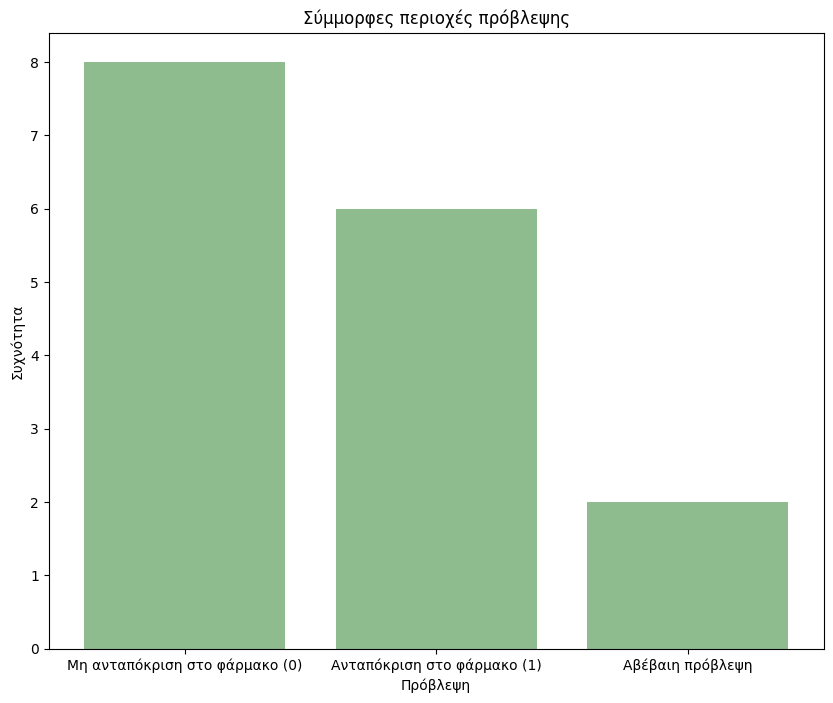

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given boolean matrix
matrix = np.array(predictions_test_sets)

# Count the occurrences of each category

non_responders = np.sum(matrix[:, 0] & ~matrix[:, 1])
responders = np.sum(~matrix[:, 0] & matrix[:, 1])
uncertain = np.sum(np.all(matrix, axis=1))

# Define categories and counts
categories = ['Non responder (0)', 'Responder(1)', 'Uncertain']
counts = [non_responders, responders, uncertain]

# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.bar(categories, counts, color=['darkseagreen', 'darkseagreen', 'darkseagreen'])
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.title('Conformal prediction region')
plt.show()


In [ ]:
# Convert the list to a DataFrame
table = pd.DataFrame(predictions_test_sets, columns=['Prediction1', 'Prediction2'])

# Group and count the combinations of "true" and "false" predictions
combination_counts = table.groupby(['Prediction1', 'Prediction2']).size().reset_index(name='Count')

# Display the resulting table
print(combination_counts)

   Prediction1  Prediction2  Count
0        False         True      6
1         True        False      8
2         True         True      2


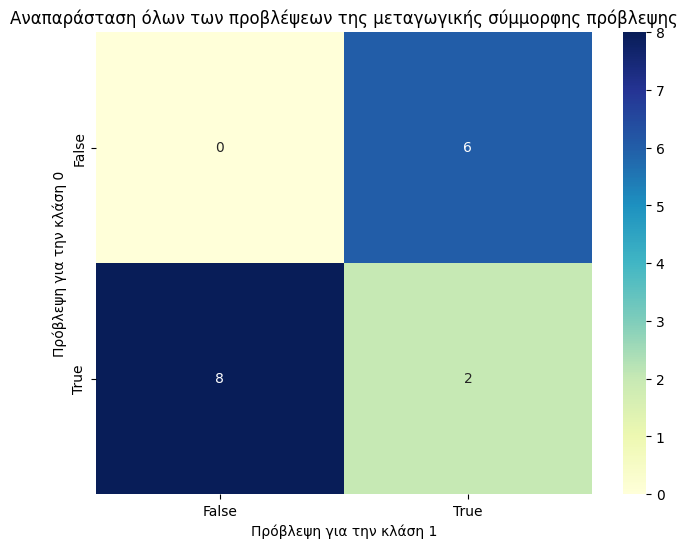

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Convert the list to a DataFrame
table = pd.DataFrame(predictions_test_sets, columns=['Prediction1', 'Prediction2'])

# Create a pivot table to count combinations
pivot_table = table.groupby(['Prediction1', 'Prediction2']).size().unstack(fill_value=0)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Prediction for class 1')
plt.ylabel('Prediction for class 0')
plt.show()

In [ ]:
#EVALUATION
print('Conformal classification based on conformity values:')
acc = get_accuracy(predictions_test_sets, y_test)
oneC, avgC = get_oneC_avgC(predictions_test_sets)
print('Accuracy of region predictor: {}%'.format(acc * 100))
print('Efficience:\n\t oneC = {}\n\t avgC = {}'.format(oneC, avgC))

Conformal classification based on conformity values:
Accuracy of region predictor: 93.75%
Efficience:
	 oneC = 0.875
	 avgC = 1.125


##USE THE NONCONFORMIST

You can use the nonconformist package instead of making the previous proccess manualy

Take a look here https://github.com/donlnz/nonconformist

In [ ]:
!pip install nonconformist

  Preparing metadata (setup.py) ... done
  Created wheel for nonconformist: filename=nonconformist-2.1.0-py3-none-any.whl size=17817 sha256=8395a4efc680109caff4df521ed1a43f2690a6471571dc47a4d8db47b1db2d98
  Stored in directory: /root/.cache/pip/wheels/50/0c/42/7f1bdc102730e363402b4414413de01d69d9f54c7df9578e32
Successfully built nonconformist


In [ ]:
from nonconformist.cp import TcpClassifier
from nonconformist.nc import NcFactory
from nonconformist.nc import InverseProbabilityErrFunc, MarginErrFunc

In [ ]:

nc = NcFactory.create_nc(SVM,err_func=InverseProbabilityErrFunc())	# Create a default nonconformity function, this is the inverse probability (hinge loss) nonconformity measure we used above
tcp = TcpClassifier(nc)			# Create a transductive conformal classifier

In [ ]:
# Fit the TCP using the proper training set
tcp.fit(X_train, y_train)

In [ ]:
# Produce predictions for the test set, with confidence 95%
prediction = tcp.predict(X_test.values, significance=0.05)

In [ ]:
#EVALUATION
print('Conformal classification based on conformity values:')
acc = get_accuracy(prediction, y_test)
oneC, avgC = get_oneC_avgC(prediction)
print('Accuracy of region predictor: {}%'.format(acc * 100))
print('Efficience:\n\t oneC = {}\n\t avgC = {}'.format(oneC, avgC))

Conformal classification based on conformity values:
Accuracy of region predictor: 93.75%
Efficience:
	 oneC = 0.875
	 avgC = 1.125


In [ ]:
# Here we output prediction sets we constructed manually by writing code from scratch and comparing it with the output from Nonconformist. The results are the same.
for i in range(len(predictions_test_sets)):
  print(predictions_test_sets[i], prediction[i, :])

[False, True] [False  True]
[False, True] [False  True]
[True, False] [ True False]
[True, True] [ True  True]
[True, False] [ True False]
[False, True] [False  True]
[True, False] [ True False]
[False, True] [False  True]
[True, True] [ True  True]
[True, False] [ True False]
[False, True] [False  True]
[True, False] [ True False]
[False, True] [False  True]
[True, False] [ True False]
[True, False] [ True False]
[True, False] [ True False]
